
___
# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


Now let's get the movie titles:

In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


We can merge them together:

In [5]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.shape

(100003, 5)

# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [10]:
df.groupby('user_id')['rating'].mean().sort_values(ascending=False).head()

user_id
849    4.869565
688    4.833333
507    4.724138
628    4.703704
928    4.687500
Name: rating, dtype: float64

In [11]:
df.groupby('user_id')['rating'].count().sort_values(ascending=False).head()

user_id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

In [12]:
ratings1 = pd.DataFrame(df.groupby('user_id')['rating'].mean())
ratings1['num of ratings'] = pd.DataFrame(df.groupby('user_id')['rating'].count())
ratings1.head()

,rating,num of ratings
user_id,,
0,3.666667,3
1,3.610294,272
2,3.709677,62
3,2.796296,54
4,4.333333,24


In [13]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now set the number of ratings column:

In [14]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now a few histograms:

<AxesSubplot:>

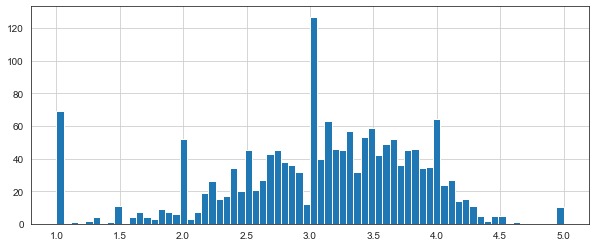

In [15]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

<AxesSubplot:>

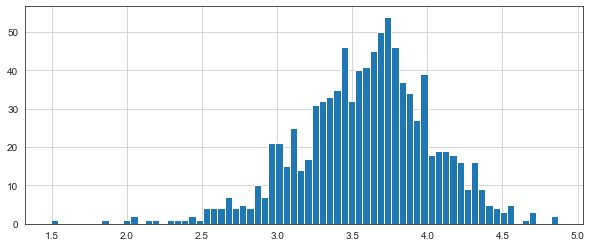

In [16]:
plt.figure(figsize=(10,4))
ratings1['rating'].hist(bins=70)

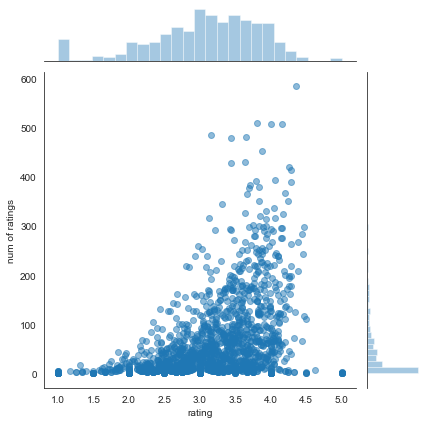

In [17]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

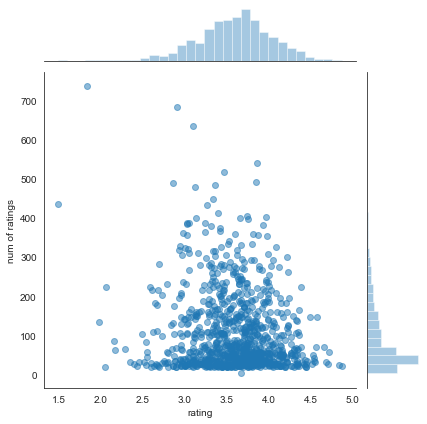

In [18]:
sns.jointplot(x='rating',y='num of ratings',data=ratings1,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [39]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
pd.set_option('display.max_columns',None)
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    8 1/2 (1963)  8 Heads in a Duffel Bag (1997)  8 Seconds (1994)  \
user_id                                                                   
0                 NaN                             NaN               NaN   
1                 NaN                             NaN               NaN   
2                 NaN                             NaN               NaN   
3                 NaN                             NaN               NaN   
4                 NaN                             NaN               NaN   

title    A Chef in Love (1996)  Above the Rim (1994)  Absolute Power (1997)  \
user_id                                                                       
0                          NaN                   NaN                    NaN   
1                          NaN                   NaN                    NaN   
2                          NaN                   NaN                    3.0   
3                          NaN                   NaN                    NaN   
4                          NaN                   NaN                    NaN   

title    Abyss, The (1989)  Ace Ventura: Pet Detective (1994)  \
user_id                                                         
0                      NaN                                NaN   
1                      3.0                                3.0   
2                      NaN                                NaN   
3                      NaN                                NaN   
4                      NaN                                NaN   

title    Ace Ventura: When Nature Calls (1995)  Across the Sea of Time (1995)  \
user_id                                                                         
0                                          NaN                            NaN   
1                                          NaN                            NaN   
2       

In [20]:
# moviemat = df.pivot_table(index='title',columns='user_id',values='rating')
# pd.set_option('display.max_columns',None)
# moviemat.head()

user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [21]:
moviemat.shape

(1664, 944)

Most rated movie:

In [27]:
'Liar Liar (1997)' in list(moviemat.index)

True

In [29]:
moviemat.loc['Liar Liar (1997)',:]

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [22]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [23]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now let's grab the user ratings for those two movies:

In [34]:
# starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat.loc['Liar Liar (1997)',:]
liarliar_user_ratings.head()
# starwars_user_ratings.head()


user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [40]:
starwars_user_ratings = moviemat['Star Wars (1977)']

starwars_user_ratings.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [41]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [89]:
a = moviemat['Con Air (1997)']
b = moviemat.corrwith(a)
b = pd.DataFrame(b,columns=['Correlation'])
b.dropna(inplace=True)
b = b.join(ratings['num of ratings'])
b[b['num of ratings']>100].sort_values('Correlation',ascending=False).head()

C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of ratings
title,,
Con Air (1997),1.000000,137
"Rainmaker, The (1997)",0.629809,145
My Left Foot (1989),0.616057,121
"Philadelphia Story, The (1940)",0.601457,104
Ghost (1990),0.568964,170


In [91]:
c = b[b['num of ratings']>100].sort_values('Correlation',ascending=False)
'Liar Liar (1997)' in c.index

True

In [92]:
c.loc['Liar Liar (1997)',:]

Correlation         0.469828
num of ratings    485.000000
Name: Liar Liar (1997), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [42]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [43]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [45]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [46]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values and notice how the titles make a lot more sense:

In [47]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


Now the same for the comedy Liar Liar:

In [49]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
final_df = corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

In [51]:
final_df.head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [53]:
final_df.index[:6]

Index(['Liar Liar (1997)', 'Batman Forever (1995)', 'Mask, The (1994)',
       'Down Periscope (1996)', 'Con Air (1997)'],
      dtype='object', name='title')

In [1]:
import numpy as np
import pandas as pd
def Load_data():
    column_names = ['user_id', 'item_id', 'rating', 'timestamp']
    df = pd.read_csv('u.data', sep='\t', names=column_names)
    titles = pd.read_csv("Movie_Id_Titles")
    df = pd.merge(df,titles,on='item_id')
    return df

In [2]:
def Recom_movies_ByMovie(df, movie):
    ratings = pd.DataFrame(df.groupby('title')['rating'].mean())                    # Ratings dataframe by groupby title by rating
    ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count()) # Add rating counts columns
    moviemat = df.pivot_table(index='user_id',columns='title',values='rating')      # Pivot table for movie title and user_id
    user_ratings = moviemat[movie]                                         # for particular given movie
    similar_to_movie = moviemat.corrwith(user_ratings)                     # find (similar movie) corr with given movie dataframe
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])    # give name to column Correlation
    corr_movie.dropna(inplace=True)                                        # Drop null value raws
    corr_movie = corr_movie.join(ratings['num of ratings'])                # join column num of ratings from ratings dataframe
    # final correlated movie with given movie for only count of rating greater than 100
    final_corr_movie = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False)
    # find out list of five recommended movie by given movie based 
    first_five_rec = final_corr_movie.index[1:11].tolist()
    return first_five_rec

In [3]:
def get_movies_name(df):
    movies_names = list(set(df['title']))
    return movies_names

In [8]:
# df.to_csv("data.csv")

In [4]:
df = Load_data()
movies_names = get_movies_name(df)
print(len(movies_names))
movies_names[:20]

1664


['Tales from the Crypt Presents: Bordello of Blood (1996)',
 'Specialist, The (1994)',
 'Bean (1997)',
 'Band Wagon, The (1953)',
 'Happy Gilmore (1996)',
 "Boy's Life 2 (1997)",
 'Color of Night (1994)',
 'Mystery Science Theater 3000: The Movie (1996)',
 'Pagemaster, The (1994)',
 'Head Above Water (1996)',
 'Women, The (1939)',
 'Favor, The (1994)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Reservoir Dogs (1992)',
 'Bloody Child, The (1996)',
 'Buddy (1997)',
 'Three Caballeros, The (1945)',
 'Tank Girl (1995)',
 'Chain Reaction (1996)',
 'Last Dance (1996)']

In [5]:
df = Load_data()
movie = 'Liar Liar (1997)'
rec_movie = Recom_movies_ByMovie(df,movie)
rec_movie

C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


['Batman Forever (1995)',
 'Mask, The (1994)',
 'Down Periscope (1996)',
 'Con Air (1997)',
 'Pretty Woman (1990)',
 '101 Dalmatians (1996)',
 'Michael (1996)',
 'Waterworld (1995)',
 'Indiana Jones and the Last Crusade (1989)',
 'Young Guns (1988)']

In [93]:
df = Load_data()
movie = input("Enter Movie Name:  ")
rec_5_movie = Recom_movies_ByMovie(df,movie)
rec_5_movie

Enter Movie Name:  Rainmaker, The (1997)


C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


['Platoon (1986)',
 'Close Shave, A (1995)',
 'Ghost and the Darkness, The (1996)',
 'In the Line of Fire (1993)',
 'Con Air (1997)',
 'Outbreak (1995)',
 'Searching for Bobby Fischer (1993)',
 'Eraser (1996)',
 'Miracle on 34th Street (1994)',
 'Full Metal Jacket (1987)']

In [94]:
import numpy as np
import pandas as pd
def Load_data():
    column_names = ['user_id', 'item_id', 'rating', 'timestamp']
    df = pd.read_csv('u.data', sep='\t', names=column_names)
    titles = pd.read_csv("Movie_Id_Titles")
    df = pd.merge(df,titles,on='item_id')
    return df

In [95]:
df = Load_data()
ratings1 = pd.DataFrame(df.groupby('user_id')['rating'].mean())                    # Ratings dataframe by groupby title by rating
ratings1['num of ratings'] = pd.DataFrame(df.groupby('user_id')['rating'].count()) # Add rating counts columns
moviemat = df.pivot_table(index='title',columns='user_id',values='rating')      # Pivot table for movie title and user_id
user_ratings = moviemat[290]                                         # for particular given movie
similar_to_movie = moviemat.corrwith(user_ratings)                     # find (similar movie) corr with given movie dataframe
corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])    # give name to column Correlation
corr_movie.dropna(inplace=True)                                        # Drop null value raws
corr_movie = corr_movie.join(ratings1['num of ratings'])                # join column num of ratings from ratings dataframe

# final correlated movie with given movie for only count of rating greater than 100
final_corr_movie = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False)
# find out list of five recommended movie by given movie based 
first_five_rec = final_corr_movie.index[1:6].tolist()

C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [98]:
moviemat

user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [96]:
final_corr_movie

,Correlation,num of ratings
user_id,,
290,1.000000,150
863,1.000000,107
489,0.927173,109
104,0.748798,111
708,0.627682,105
...,...,...
840,-0.276936,197
385,-0.310553,281
342,-0.333980,201


In [97]:
first_five_rec

[863, 489, 104, 708, 264]

In [75]:
def Recom_movie_ById(df, ids):
    ratings1 = pd.DataFrame(df.groupby('user_id')['rating'].mean())                    # Ratings dataframe by groupby title by rating
    ratings1['num of ratings'] = pd.DataFrame(df.groupby('user_id')['rating'].count()) # Add rating counts columns
    moviemat = df.pivot_table(index='title',columns='user_id',values='rating')      # Pivot table for movie title and user_id
    user_ratings = moviemat[ids]                                         # for particular given movie
    similar_to_movie = moviemat.corrwith(user_ratings)                     # find (similar movie) corr with given movie dataframe
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])    # give name to column Correlation
    corr_movie.dropna(inplace=True)                                        # Drop null value raws
    corr_movie = corr_movie.join(ratings['num of ratings'])                # join column num of ratings from ratings dataframe
    # final correlated movie with given movie for only count of rating greater than 100
    final_corr_movie = corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False)
    # find out list of five recommended movie by given movie based 
    first_five_rec = final_corr_movie.index[1:6].tolist()
    return first_five_rec

In [79]:
df = Load_data()
movie = 290
rec_5_movie = Recom_movie_ByMovie(df,movie)
rec_5_movie

C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Anaji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[]